# Permutation Test example

This is a Python port (with minor modifications) of [Thomas Leeper's R permutation test example](http://thomasleeper.com/Rcourse/Tutorials/permutationtests.html).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mltools.hypothesis_test import PermutationTest

We generate a sample $X$ of Bernoulli data and another Bernoulli sample $Y$ (of different size) offset by some Gaussian noise.

In [2]:
np.random.seed(0)
x = np.random.binomial(n=1, p=0.5, size=100)
y = np.random.binomial(n=1, p=0.5, size=150) + np.random.normal(loc=1, scale=3, size=150)

Histograms of the two samples:

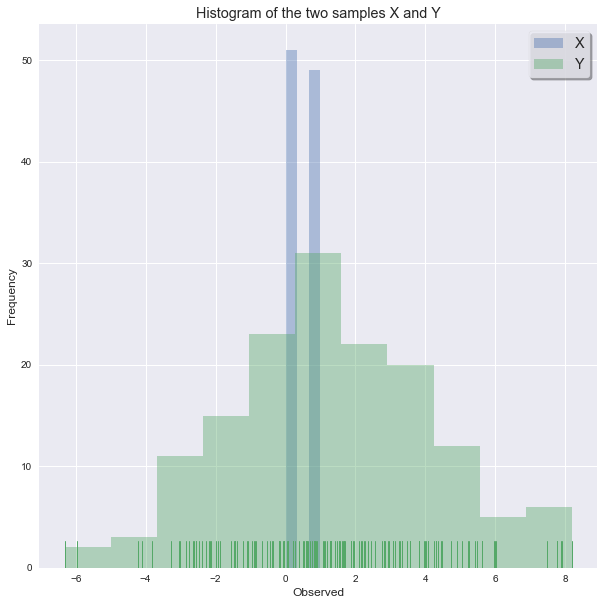

In [3]:
plt.figure(figsize=(10, 10))
sns.set_style("darkgrid")
sns.set(color_codes=True)

sns.distplot(x, kde=False, label="X")
sns.distplot(y, kde=False, rug=True, label="Y")

plt.legend(loc="best", frameon=True, shadow=True, fontsize="large")
plt.title("Histogram of the two samples X and Y", fontsize="large")
plt.xlabel("Observed", fontsize="medium")
plt.ylabel("Frequency", fontsize="medium")

plt.show()
plt.close()

We expect the difference in means between $X$ and $Y$ to be close to $1$.

In [4]:
true_diff = np.mean(y) - np.mean(x)
print(true_diff)

0.829291872847


Now we perform a permutation test to determine whether this difference could be attributed to chance alone (we expect it couldn't).

In [5]:
%%time

pt = PermutationTest(x, y)
pt.test(n=10000)

CPU times: user 501 ms, sys: 18.7 ms, total: 520 ms
Wall time: 531 ms


To visualize the test, we plot the histogram of the empirical distribution of mean differences obtained for the permutation test, and compare it to the true mean difference.

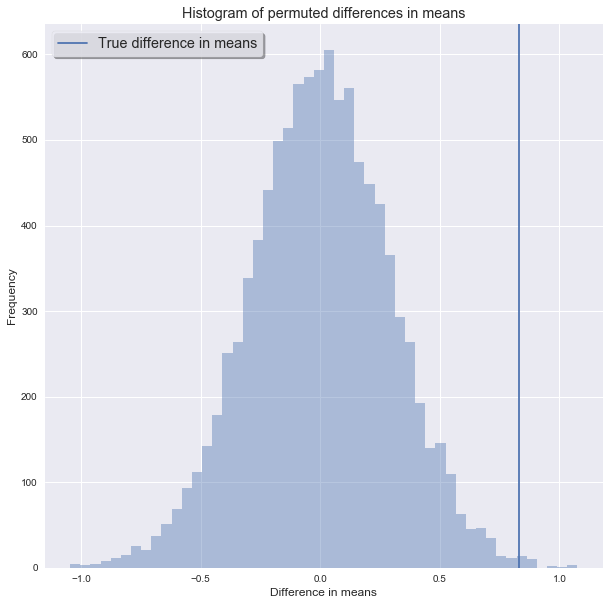

In [6]:
plt.figure(figsize=(10, 10))
sns.set_style("darkgrid")
sns.set(color_codes=True)

sns.distplot(pt.dist, kde=False)
plt.axvline(pt.true_diff, label="True difference in means")
plt.legend(loc="best", frameon=True, shadow=True, fontsize="large")
plt.title("Histogram of permuted differences in means", fontsize="large")
plt.xlabel("Difference in means", fontsize="medium")
plt.ylabel("Frequency", fontsize="medium")
plt.show()
plt.close()

The histogram suggests that our null hypothesis (that the true means of $X$ and $Y$ are the same) can probably be rejected.
The observed difference in means is extreme relative to the empirical distribution of the mean differences of the permuted samples.
To verify that the difference is significant, we report the one-sided $p$-value our test.

In [7]:
p_value = pt.p_value(kind="greater")
print(f"p-value: {p_value}")

p-value: 0.0024
